# Уравнение Кеплера
## Постановка задачи


Уравнение Кеплера для вычисления орбиты имеет вид 𝑀=𝐸−𝜀sin𝐸,
где 𝑀 – средняя аномалия, 𝐸 – эксцентрическая аномалия, 𝜀 – эксцентриситет орбиты. Пусть 𝑀=24.851090 , 𝜀=0.1.

Для примера возьмем планету Марс, т.к. примерно равные эксцентриситеты(используется только для построения орбиты).

1) Построим орбиту, используя метод последовательных приближений найдем E.

2) Найдем E, используя scipy.optimize.brentq.

3) Вычислим E с помощью формулы:

$$E = M + 2\sum_{m=1}^{\infty} \frac{1}{m} J_m(m\varepsilon) \sin(mM)$$    
где $J_m(x)$ – функция Бесселя$1$-го рода порядка $m$. Найдем $E$ по предыдущей формуле, используя равенство
$$J_m(m\varepsilon) = \sum_{n=0}^{\infty} \frac{(-1)^n (m\varepsilon/2)^{2n+m}}{n!(m+n)!}.$$


In [1]:
# Импорт библиотек и модулей
from scipy.optimize import brentq
from math import sin, cos, sqrt, factorial
from matplotlib.pyplot import figure, title, plot, show
from scipy.special import jv


Вывод уравнения Кеплера
$$sqrt(1-e^2)$$
окружность. Здесь e — эксцентриситет.

Найдем теперь зависимость этой площади от положения небесного тела на орбите, то есть от величины радиус-вектора $r$ и истинной аномалии — угла между перигелием и небесным телом, если смотреть с Солнца.

Для этого введем дополнительную переменную — эксцентрическую аномалию $E$. Направим ось $x$ от Солнца (начала координат), которое находится в одном из фокусов эллипса, в сторону перигелия по линии апсид (прямой, соединяющей перицентр с апоцентром). Создадим также вспомогательную окружность с радиусом, равным большой полуоси эллипса.

Абсцисса небесного тела в точке $P$ будет равна

$$x=cos(E)-a*e$$

ордината будет, соответственно, равна

$$y=asin(E)sqrt(1-e^2)$$

Таким образом, получаем

$$x=rcos(v)=acos(E)-e$$

$$y=rsin(v)=asin(E)*sqrt(1-e^2)$$

Для вычисления площади $S$ рассмотрим вспомогательные фигуры: сектор окружности $P'-O-Per$:

$$S1=a^2*E/2$$

Сектор эллипса $P-O-Per$:

$$S2=S1*sqrt(1-e^2)$$

Треугольник $O-O'-P$:

$$S3=1/2(yae)=1/2a^2esinE*sqrt(1-e^2)$$

Сектор $-O'-Per$:

$$S=S2-S3$$

Отсюда, прощадь $S$ равна:

$$S(t)=1/2a^2sqrt(1-e^2)(E-esin(E))$$

Сравнивая это выражение с выведенным ранее из второго закона Кеплера, получаем:

$$M(t)=E(t)-e*sin(E(t))$$

где $M(t)=2pit/T$


In [2]:
# Исходные данные
A = -30
B = 30
N = 360
Eps = 0.1
M = 24.851090
a = 1496e5*1.52
m = 10
n = 10

N = int(N)

In [3]:
# Функция средней аномалии
def e(e_old):
    return e_old - M - Eps*sin(e_old)

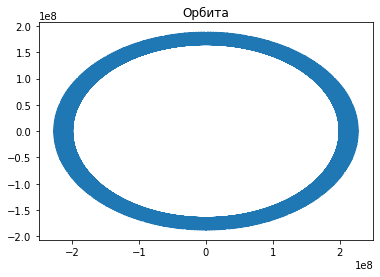

In [4]:
# Построение орбиты
r = [i for i in range(0, N)]
dx = [a*cos(i)-Eps for i in r]
dy = [a*sin(i)*sqrt(1-Eps**0.5) for i in r]
fig1 = figure()
graph1 = plot(dx, dy)
title('Орбита')
show(graph1)

Рассчитаем и приведем зависимость аномалии:

In [5]:
x = [((B-A)/N)*i for i in range(N)]
M0 = [e(x[i]) for i in range(N)]

Вычислим $E$ методом последовательных приближений:
$$M=E-e*sin(E)$$

$$Е = М + e*sin E$$

В правую часть уравнения вместо $Е$ подставляется $М$ и находится

$$Е1 = М + e sin М$$

Затем в правую часть уравнения вместо $Е$ подставляется $Е1$ и находится $Е2$ и так далее

$$Е(k+1)= М + e*sin Ek$$

Вычислим $E$ при помощи scipy.optimize.brentq:

In [6]:
E1 = brentq(e, A, B)

Вычислим $Е$ при помощи метода последовательных приближений с использованием встроенной функции Бесселя

In [7]:
E2 = list()
for i in range(1, m+1):
    E2.append(1/i*jv(i, Eps)*sin(i*M))
E2 = M + 2*sum(E2)

Вычислим Е при помощи метода последовательных приближений с использованием формулы для функции Бесселя

In [8]:
E3 = list()
for i in range(1, m+1):
    Jv = [((-1)**j*((i*Eps)/2)**(2*j+i))/(factorial(j)*factorial(i+j)) for j in range(n)]
    Jv = sum(Jv)
    E3.append(1/i*Jv*sin(i*M))
E3 = M + 2*sum(E3)

In [9]:
print('Значения:\n'
      '   * E1 = ' + str(E1) + ';\n'
      '   * E2 = ' + str(E2) + ';\n'
      '   * E3 = ' + str(E3) + ';\n'
      )

Значения:
   * E1 = 24.820357182542907;
   * E2 = 24.822653088245808;
   * E3 = 24.82035718254295;



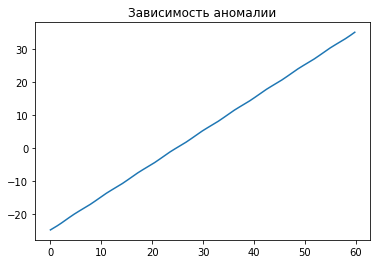

In [10]:
# Создание и вывод графиков
fig2 = figure()
graph2 = plot(x, M0)
title('Зависимость аномалии')
show(graph2)


## Вывод

1) Все 3 способа дали практически идентичный результат(погрешность = 10^(-9))

2) Самый долгий способ - нахождение эксцентрической аномалии при помощи метода последовательных приближений с использованием формулы для функции Бесселя. Остальные два способа работают с примерно одинаковым быстродействием.